In [1]:
# standard ds imports
import numpy as np
import pandas as pd

# for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for statistical analysis
import scipy.stats as stats

# for wrangling
import wrangle

# for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [2]:
zil = wrangle.wrangle_zillow()

#### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [6]:
# cool cool cool

#### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [4]:
train, val, test = wrangle.split_data(zil)

In [5]:
train, val, test = wrangle.impute_mode(train, val, test, 'built')

In [9]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,location
1904381,2.0,2.0,1323.0,552000.0,1986.0,5667.34,6059.0
1514967,3.0,1.0,1017.0,207721.0,1944.0,3238.93,6037.0
693486,3.0,1.0,1198.0,509712.0,1938.0,5621.58,6037.0
1737733,3.0,2.0,1468.0,712903.0,1938.0,8962.32,6037.0
1387767,3.0,2.5,1830.0,719668.0,1994.0,8330.70,6059.0


#### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [261]:
def plot_variable_pairs(df):
    # fig, axes = plt.subplots(len(df.columns.values),len(df.columns.values),figsize=(20,20))
    # for i, col in enumerate(df.columns.values):
    #     for j, col2 in enumerate(df.columns.values):
    #         sns.lmplot(axes[i,j], data=df, x=col, y=col2, line_kws={'color':'red'})
    #         axes[i,j].set_title(f'{col} vs {col2}')
    sns.pairplot(data=df, corner=True, kind='reg')
    plt.show()
            

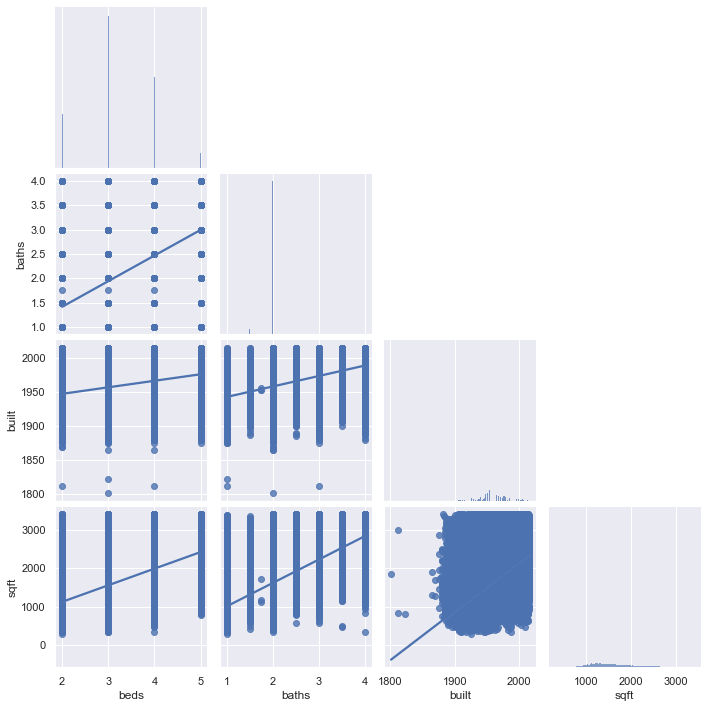

In [262]:
plot_variable_pairs(train[['beds', 'baths','built','sqft']])

#### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [47]:
def plot_cat_and_cont_vars(df, cat_cols, cont_cols):
    fig, axs = plt.subplots(len(cont_cols), 3, figsize=(16,10))
    for row, col in enumerate(cont_cols):
        for clm, col2 in enumerate(cat_cols):
            axs[row,1].plot(df[col], df[col2])
            axs[row,1].set_title(df[col], df[col2])

#### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [46]:
# they both are terrible.

#### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [49]:
# Done. Still terrible.

#### 7. Come up with some initial hypotheses based on your goal of predicting property value.

In [107]:
# Is there a relationship between taxes and tax_value? Control for location? Control for decade built?
# How do different ranges of tax_values compare in beds? baths? Control for location? Control for decade built?
# Are there any subgroups that can be created? 
# Do the means or median of each decade change? Contorl for location?

#### 8. Visualize all combinations of variables in some way.

In [52]:
train.built.max()

2016.0

In [288]:
train['decade'] = pd.cut(train.built, 
                         bins=[1800,1850,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020], 
                         labels=['1800', '1850', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010'])

In [289]:
train.location.value_counts()

6037.0    745023
6059.0    280944
6111.0     87176
Name: location, dtype: int64

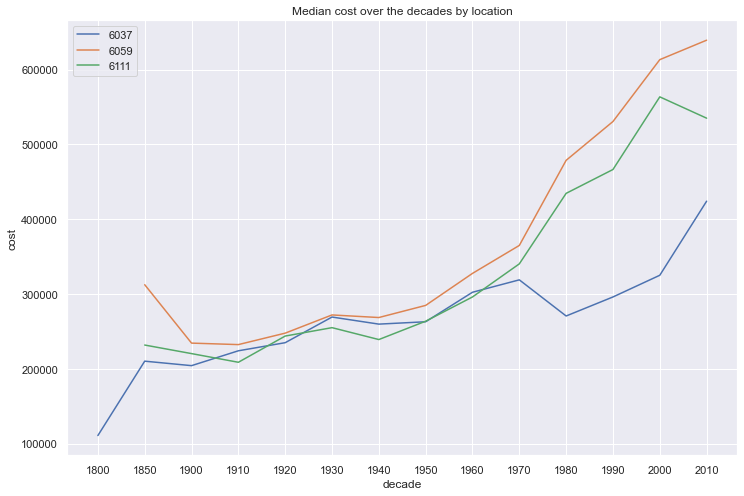

In [290]:
plt.figure(figsize=(12,8))
plt.plot(train[train.location == 6037.0].groupby('decade').tax_value.median(), label='6037')
plt.plot(train[train.location == 6059.0].groupby('decade').tax_value.median(), label='6059')
plt.plot(train[train.location == 6111.0].groupby('decade').tax_value.median(), label='6111')
plt.xlabel('decade')
plt.ylabel('cost')
plt.title('Median cost over the decades by location')
plt.legend()
plt.show()

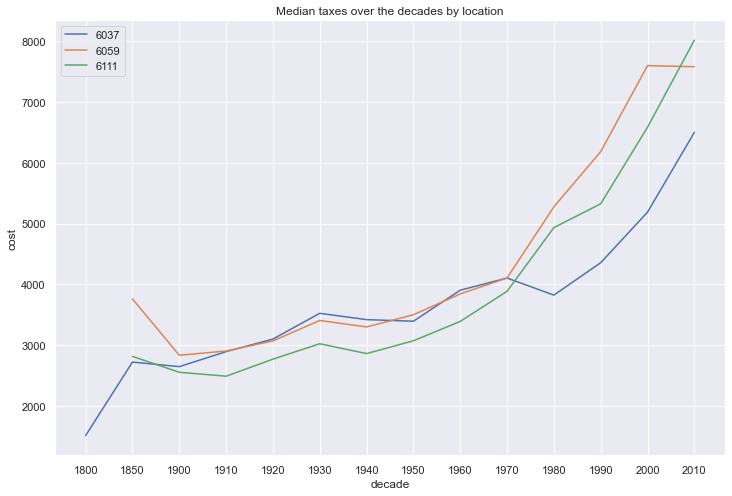

In [291]:
plt.figure(figsize=(12,8))
plt.plot(train[train.location == 6037.0].groupby('decade').taxes.median(), label='6037')
plt.plot(train[train.location == 6059.0].groupby('decade').taxes.median(), label='6059')
plt.plot(train[train.location == 6111.0].groupby('decade').taxes.median(), label='6111')
plt.xlabel('decade')
plt.ylabel('cost')
plt.title('Median taxes over the decades by location')
plt.legend()
plt.show()

In [292]:
# Taxes go up steadily even though home price does not (around 1970s for blue and 2010s for green/orange)

In [293]:
train[train.location==6111][['tax_value']].describe(percentiles=[.25,.5,.75,]).T

,count,mean,std,min,25%,50%,75%,max
tax_value,87176.0,363366.77308,196512.851553,4544.0,222515.0,347481.0,490000.0,950809.0


In [185]:

dist = []
for index, house in train.iterrows():
    if house.location == 6037:
        if house.tax_value <= 158299:
            dist.append('1q')
        elif house.tax_value <= 268714:
            dist.append('2q')
        elif house.tax_value <= 415949:
            dist.append('3q')
        elif house.tax_value <= 950000:
            dist.append('4q')
        else:
            dist.append('ukn')
    elif house.location == 6059:
        if house.tax_value <= 222884:
            dist.append('1q')
        elif house.tax_value <= 362234:
            dist.append('2q')
        elif house.tax_value <= 529000:
            dist.append('3q')
        elif house.tax_value <= 950940:
            dist.append('4q')
        else:
            dist.append('ukn')
    elif house.location == 6111:
        if house.tax_value <= 222515:
            dist.append('1q')
        elif house.tax_value <= 347481:
            dist.append('2q')
        elif house.tax_value <= 490000:
            dist.append('3q')
        elif house.tax_value <= 950809:
            dist.append('4q')
        else:
            dist.append('ukn')
    else:
        dist.append('ukn')

In [232]:
train['location_percentile'] = dist

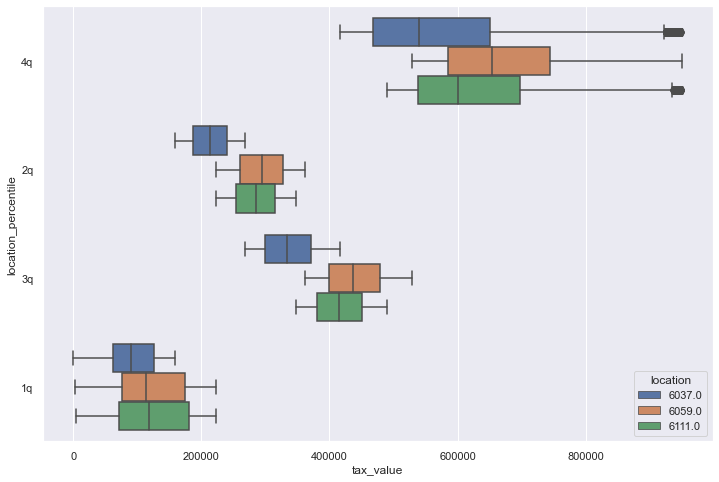

In [233]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='tax_value', y='location_percentile', hue='location')
plt.show()

In [201]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,1113143.0,3.214036,0.781250,2.00,3.000,3.00,4.00,5.00
baths,1113143.0,2.053702,0.708028,1.00,2.000,2.00,2.50,4.00
sqft,1113143.0,1653.699193,564.895659,308.00,1230.000,1547.00,1988.00,3410.00
tax_value,1113143.0,327994.446527,199016.694684,22.00,173983.000,296717.00,452500.00,950940.00
built,1113143.0,1959.434087,20.544064,1801.00,1949.000,1957.00,1972.00,2016.00
taxes,1113143.0,4070.159468,2243.199441,18.72,2367.595,3748.54,5488.36,10377.84
location,1113143.0,6048.347861,20.548387,6037.00,6037.000,6037.00,6059.00,6111.00


In [203]:
train['overall_percentile'] = pd.cut(train.tax_value,
                                    bins = [0,173983,296717,452500,950940],
                                    labels = ['1q','2q','3q','4q'])

In [205]:
pd.crosstab(train.location, train.overall_percentile, margins=True)

overall_percentile,1q,2q,3q,4q,All
location,,,,,
6037.0,210260,204904,177548,152311,745023
6059.0,52313,54427,75193,99011,280944
6111.0,15715,18955,25566,26940,87176
All,278288,278286,278307,278262,1113143


In [209]:
# 6037 seems to have the most in the lower cost ranges and 6059 has the most in the higher cost ranges

In [214]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,location,decade,cost_percentiles_by_location,overall_percentile
1904381,2.0,2.0,1323.0,552000.0,1986.0,5667.34,6059.0,1980s,4q,4q
1514967,3.0,1.0,1017.0,207721.0,1944.0,3238.93,6037.0,1940s,2q,2q
693486,3.0,1.0,1198.0,509712.0,1938.0,5621.58,6037.0,1930s,4q,4q
1737733,3.0,2.0,1468.0,712903.0,1938.0,8962.32,6037.0,1930s,4q,4q
1387767,3.0,2.5,1830.0,719668.0,1994.0,8330.70,6059.0,1990s,4q,4q


In [213]:
train.beds.median(), train.baths.median()

(3.0, 2.0)

<AxesSubplot:xlabel='baths', ylabel='count'>

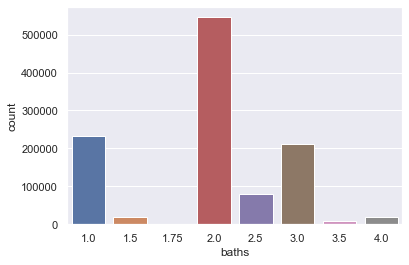

In [221]:
sns.countplot(data=train, x='baths')

<AxesSubplot:xlabel='beds', ylabel='count'>

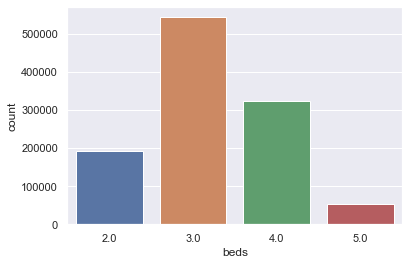

In [222]:
sns.countplot(data=train, x='beds')

<AxesSubplot:xlabel='location', ylabel='count'>

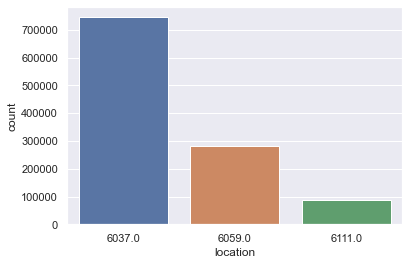

In [223]:
sns.countplot(data=train, x='location')

In [263]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,location,decade,overall_percentile,location_percentile,bed_baths
1904381,2.0,2.0,1323.0,552000.0,1986.0,5667.34,6059.0,1980s,4q,4q,4.0
1514967,3.0,1.0,1017.0,207721.0,1944.0,3238.93,6037.0,1940s,2q,2q,3.0
693486,3.0,1.0,1198.0,509712.0,1938.0,5621.58,6037.0,1930s,4q,4q,3.0
1737733,3.0,2.0,1468.0,712903.0,1938.0,8962.32,6037.0,1930s,4q,4q,6.0
1387767,3.0,2.5,1830.0,719668.0,1994.0,8330.70,6059.0,1990s,4q,4q,7.5


<AxesSubplot:xlabel='overall_percentile', ylabel='count'>

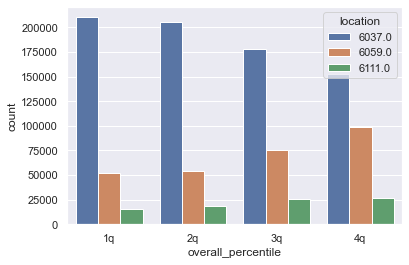

In [224]:
sns.countplot(data=train, x='overall_percentile', hue='location')

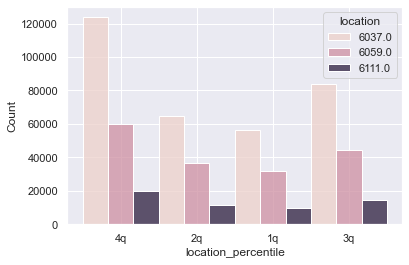

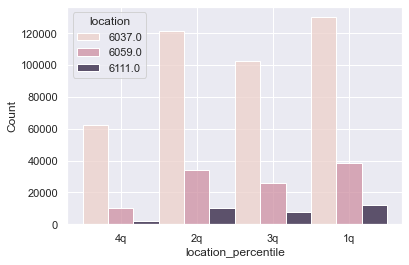

In [240]:
sns.histplot(data=train[train.sqft >= train.sqft.median()], x='location_percentile', hue='location', multiple='dodge')
plt.show()
sns.histplot(data=train[train.sqft <= train.sqft.median()], x='location_percentile', hue='location', multiple='dodge')
plt.show()

In [296]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,location,decade,overall_percentile,location_percentile
1904381,2.0,2.0,1323.0,552000.0,1986.0,5667.34,6059.0,1980,4q,4q
1514967,3.0,1.0,1017.0,207721.0,1944.0,3238.93,6037.0,1940,2q,2q
693486,3.0,1.0,1198.0,509712.0,1938.0,5621.58,6037.0,1930,4q,4q
1737733,3.0,2.0,1468.0,712903.0,1938.0,8962.32,6037.0,1930,4q,4q
1387767,3.0,2.5,1830.0,719668.0,1994.0,8330.70,6059.0,1990,4q,4q


<Figure size 864x648 with 0 Axes>

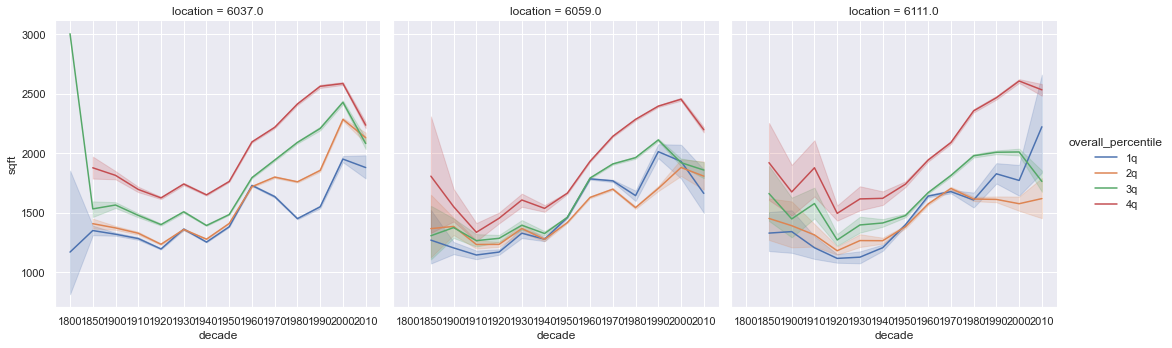

In [317]:
plt.figure(figsize=(12,9))
sns.relplot(data=train, x='decade', y='sqft', col='location', hue='location_percentile', kind='line')
plt.show()

In [319]:
# houses got smaller during wartime/depression, then larger until about 2000 (housing crisis? overcrowding? Y2K? War?)

In [323]:
train.sqft.max()

3410.0

In [327]:
train['area'] = pd.cut(train.sqft,
                      bins=[300,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500],
                      labels=[500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500])

In [369]:
# train['sum_area_by_decade'] = 
train[train.decade == '2010'].groupby(['area']).area.agg('count')

area
500       0
750       3
1000     21
1250     90
1500    209
1750    714
2000    698
2250    760
2500    749
2750    539
3000    276
3250    212
3500    101
Name: area, dtype: int64

In [378]:
dist = []
for index, house in train.iterrows():
    if house.decade == '1800':
        if house.area == 500:
            dist.append('0')
        elif house.area <= 750:
            dist.append('0')
        elif house.area <= 1000:
            dist.append('2')
        elif house.area <= 1250:
            dist.append('0')
        elif house.area <= 1500:
            dist.append('0')
        elif house.area <= 1750:
            dist.append('0')
        elif house.area <= 2000:
            dist.append('1')
        elif house.area <= 2250:
            dist.append('0')
        elif house.area <= 2500:
            dist.append('0')
        elif house.area <= 2750:
            dist.append('0')
        elif house.area <= 3000:
            dist.append('0')
        elif house.area <= 3250:
            dist.append('1')
        elif house.area <= 3500:
            dist.append('0')
    if house.decade == '1850':
        if house.area == 500:
            dist.append('2')
        elif house.area <= 750:
            dist.append('37')
        elif house.area <= 1000:
            dist.append('252')
        elif house.area <= 1250:
            dist.append('419')
        elif house.area <= 1500:
            dist.append('322')
        elif house.area <= 1750:
            dist.append('219')
        elif house.area <= 2000:
            dist.append('149')
        elif house.area <= 2250:
            dist.append('98')
        elif house.area <= 2500:
            dist.append('63')
        elif house.area <= 2750:
            dist.append('39')
        elif house.area <= 3000:
            dist.append('30')
        elif house.area <= 3250:
            dist.append('22')
        elif house.area <= 3500:
            dist.append('7')
    if house.decade == '1900':
        if house.area == 500:
            dist.append('14')
        elif house.area <= 750:
            dist.append('373')
        elif house.area <= 1000:
            dist.append('2049')
        elif house.area <= 1250:
            dist.append('3066')
        elif house.area <= 1500:
            dist.append('2561')
        elif house.area <= 1750:
            dist.append('1534')
        elif house.area <= 2000:
            dist.append('942')
        elif house.area <= 2250:
            dist.append('632')
        elif house.area <= 2500:
            dist.append('499')
        elif house.area <= 2750:
            dist.append('302')
        elif house.area <= 3000:
            dist.append('190')
        elif house.area <= 3250:
            dist.append('104')
        elif house.area <= 3500:
            dist.append('48')
    if house.decade == '1910':
        if house.area == 500:
            dist.append('21')
        elif house.area <= 750:
            dist.append('712')
        elif house.area <= 1000:
            dist.append('3238')
        elif house.area <= 1250:
            dist.append('4944')
        elif house.area <= 1500:
            dist.append('3904')
        elif house.area <= 1750:
            dist.append('2487')
        elif house.area <= 2000:
            dist.append('1301')
        elif house.area <= 2250:
            dist.append('849')
        elif house.area <= 2500:
            dist.append('539')
        elif house.area <= 2750:
            dist.append('376')
        elif house.area <= 3000:
            dist.append('188')
        elif house.area <= 3250:
            dist.append('148')
        elif house.area <= 3500:
            dist.append('51')
    if house.decade == '1920':
        if house.area == 500:
            dist.append('99')
        elif house.area <= 750:
            dist.append('4750')
        elif house.area <= 1000:
            dist.append('17135')
        elif house.area <= 1250:
            dist.append('20240')
        elif house.area <= 1500:
            dist.append('14542')
        elif house.area <= 1750:
            dist.append('9026')
        elif house.area <= 2000:
            dist.append('5029')
        elif house.area <= 2250:
            dist.append('2864')
        elif house.area <= 2500:
            dist.append('1893')
        elif house.area <= 2750:
            dist.append('1171')
        elif house.area <= 3000:
            dist.append('816')
        elif house.area <= 3250:
            dist.append('458')
        elif house.area <= 3500:
            dist.append('213')
    if house.decade == '1930':
        if house.area == 500:
            dist.append('15')
        elif house.area <= 750:
            dist.append('1274')
        elif house.area <= 1000:
            dist.append('7298')
        elif house.area <= 1250:
            dist.append('10803')
        elif house.area <= 1500:
            dist.append('11400')
        elif house.area <= 1750:
            dist.append('8395')
        elif house.area <= 2000:
            dist.append('5277')
        elif house.area <= 2250:
            dist.append('3077')
        elif house.area <= 2500:
            dist.append('1850')
        elif house.area <= 2750:
            dist.append('1177')
        elif house.area <= 3000:
            dist.append('732')
        elif house.area <= 3250:
            dist.append('412')
        elif house.area <= 3500:
            dist.append('171')    
    if house.decade == '1940':
        if house.area == 500:
            dist.append('28')
        elif house.area <= 750:
            dist.append('3728')
        elif house.area <= 1000:
            dist.append('29403')
        elif house.area <= 1250:
            dist.append('44793')
        elif house.area <= 1500:
            dist.append('33278')
        elif house.area <= 1750:
            dist.append('24040')
        elif house.area <= 2000:
            dist.append('12655')
        elif house.area <= 2250:
            dist.append('6567')
        elif house.area <= 2500:
            dist.append('3697')
        elif house.area <= 2750:
            dist.append('2153')
        elif house.area <= 3000:
            dist.append('1257')
        elif house.area <= 3250:
            dist.append('669')
        elif house.area <= 3500:
            dist.append('283')
    if house.decade == '1950':
        if house.area == 500:
            dist.append('14')
        elif house.area <= 750:
            dist.append('1821')
        elif house.area <= 1000:
            dist.append('20759')
        elif house.area <= 1250:
            dist.append('78649')
        elif house.area <= 1500:
            dist.append('79081')
        elif house.area <= 1750:
            dist.append('57904')
        elif house.area <= 2000:
            dist.append('31508')
        elif house.area <= 2250:
            dist.append('16082')
        elif house.area <= 2500:
            dist.append('8626')
        elif house.area <= 2750:
            dist.append('4824')
        elif house.area <= 3000:
            dist.append('2722')
        elif house.area <= 3250:
            dist.append('1476')
        elif house.area <= 3500:
            dist.append('551')
    if house.decade == '1960':
        if house.area == 500:
            dist.append('4')
        elif house.area <= 750:
            dist.append('98')
        elif house.area <= 1000:
            dist.append('2751')
        elif house.area <= 1250:
            dist.append('18018')
        elif house.area <= 1500:
            dist.append('36613')
        elif house.area <= 1750:
            dist.append('35449')
        elif house.area <= 2000:
            dist.append('30845')
        elif house.area <= 2250:
            dist.append('23657')
        elif house.area <= 2500:
            dist.append('16446')
        elif house.area <= 2750:
            dist.append('9992')
        elif house.area <= 3000:
            dist.append('4830')
        elif house.area <= 3250:
            dist.append('2449')
        elif house.area <= 3500:
            dist.append('898')
    if house.decade == '1970':
        if house.area == 500:
            dist.append('0')
        elif house.area <= 750:
            dist.append('40')
        elif house.area <= 1000:
            dist.append('1682')
        elif house.area <= 1250:
            dist.append('10558')
        elif house.area <= 1500:
            dist.append('22243')
        elif house.area <= 1750:
            dist.append('23388')
        elif house.area <= 2000:
            dist.append('21134')
        elif house.area <= 2250:
            dist.append('17374')
        elif house.area <= 2500:
            dist.append('15212')
        elif house.area <= 2750:
            dist.append('10022')
        elif house.area <= 3000:
            dist.append('6075')
        elif house.area <= 3250:
            dist.append('3607')
        elif house.area <= 3500:
            dist.append('1232')
    if house.decade == '1980':
        if house.area == 500:
            dist.append('5')
        elif house.area <= 750:
            dist.append('19')
        elif house.area <= 1000:
            dist.append('1257')
        elif house.area <= 1250:
            dist.append('5614')
        elif house.area <= 1500:
            dist.append('12314')
        elif house.area <= 1750:
            dist.append('14869')
        elif house.area <= 2000:
            dist.append('13072')
        elif house.area <= 2250:
            dist.append('11564')
        elif house.area <= 2500:
            dist.append('9668')
        elif house.area <= 2750:
            dist.append('7654')
        elif house.area <= 3000:
            dist.append('4976')
        elif house.area <= 3250:
            dist.append('3843')
        elif house.area <= 3500:
            dist.append('1403')
    if house.decade == '1990':
        if house.area == 500:
            dist.append('0')
        elif house.area <= 750:
            dist.append('13')
        elif house.area <= 1000:
            dist.append('169')
        elif house.area <= 1250:
            dist.append('1313')
        elif house.area <= 1500:
            dist.append('3828')
        elif house.area <= 1750:
            dist.append('6337')
        elif house.area <= 2000:
            dist.append('8054')
        elif house.area <= 2250:
            dist.append('7523')
        elif house.area <= 2500:
            dist.append('6450')
        elif house.area <= 2750:
            dist.append('5425')
        elif house.area <= 3000:
            dist.append('4851')
        elif house.area <= 3250:
            dist.append('2834')
        elif house.area <= 3500:
            dist.append('1381')
    if house.decade == '2000':
        if house.area == 500:
            dist.append('1')
        elif house.area <= 750:
            dist.append('8')
        elif house.area <= 1000:
            dist.append('71')
        elif house.area <= 1250:
            dist.append('394')
        elif house.area <= 1500:
            dist.append('1180')
        elif house.area <= 1750:
            dist.append('2536')
        elif house.area <= 2000:
            dist.append('3499')
        elif house.area <= 2250:
            dist.append('4217')
        elif house.area <= 2500:
            dist.append('4492')
        elif house.area <= 2750:
            dist.append('5019')
        elif house.area <= 3000:
            dist.append('4414')
        elif house.area <= 3250:
            dist.append('3098')
        elif house.area <= 3500:
            dist.append('1369')
    if house.decade == '2010':
        if house.area == 500:
            dist.append('0')
        elif house.area <= 750:
            dist.append('3')
        elif house.area <= 1000:
            dist.append('21')
        elif house.area <= 1250:
            dist.append('90')
        elif house.area <= 1500:
            dist.append('209')
        elif house.area <= 1750:
            dist.append('714')
        elif house.area <= 2000:
            dist.append('698')
        elif house.area <= 2250:
            dist.append('760')
        elif house.area <= 2500:
            dist.append('749')
        elif house.area <= 2750:
            dist.append('539')
        elif house.area <= 3000:
            dist.append('276')
        elif house.area <= 3250:
            dist.append('212')
        elif house.area <= 3500:
            dist.append('101')

In [380]:
len(dist)

1113143

In [381]:
train['area_counts'] = dist

In [382]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,location,decade,overall_percentile,location_percentile,area,area_counts
1904381,2.0,2.0,1323.0,552000.0,1986.0,5667.34,6059.0,1980,4q,4q,1500,12314
1514967,3.0,1.0,1017.0,207721.0,1944.0,3238.93,6037.0,1940,2q,2q,1250,44793
693486,3.0,1.0,1198.0,509712.0,1938.0,5621.58,6037.0,1930,4q,4q,1250,10803
1737733,3.0,2.0,1468.0,712903.0,1938.0,8962.32,6037.0,1930,4q,4q,1500,11400
1387767,3.0,2.5,1830.0,719668.0,1994.0,8330.70,6059.0,1990,4q,4q,2000,8054


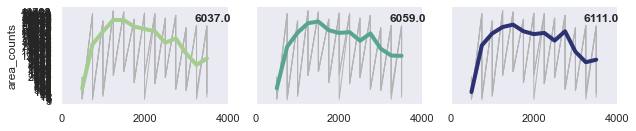

In [387]:
sns.set_theme(style='dark')

g = sns.relplot(
    data=train,
    x="area", y="area_counts", col="location", hue="location",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

for decade, ax in g.axes_dict.items():
    ax.text(.8,.85, decade, transform=ax.transAxes, fontweight="bold")
    sns.lineplot(data=train, x='area', y='area_counts', units='location',
                estimator=None, color=".7", linewidth=1, ax=ax)
    
ax.set_xticks(ax.get_xticks()[::2])

g.set_titles("")
g.set_axis_labels("","area_counts")
g.tight_layout()

#### 9. Run the appropriate statistical tests where needed.

#### 10. What independent variables are correlated with the dependent variable, home value?

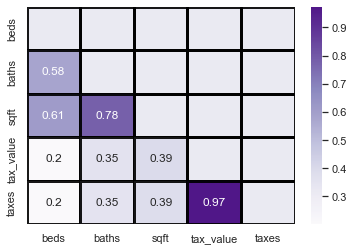

In [106]:
zil_corr = train.drop(columns=['built', 'location']).corr(method='spearman')
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(zil_corr, cmap='Purples', annot=True, mask=np.triu(zil_corr), **kwargs)
plt.show()

In [130]:
# taxes.

#### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [131]:
#sqft and baths has a high correlation. This makes sense. 